In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
gamma = 0.9
def compute_expected_returns():
    V = np.zeros((5, 5))
    for iteration in range(100):
        V_new = np.zeros((5, 5))
        for i in range(5):
            for j in range(5):
                if (i, j) == (2, 2):
                    V_new[i, j] = 10 + gamma * V[4, 1]
                elif (i, j) == (4, 3):
                    V_new[i, j] = 5 + gamma * V[2, 3]
                else:
                    total_reward = 0
                    count = 0
                    for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                        ni, nj = i + di, j + dj
                        if 0 <= ni < 5 and 0 <= nj < 5:
                            total_reward += V[ni, nj]
                        else:
                            total_reward += -1
                        count += 1
                    V_new[i, j] = (gamma / count) * total_reward
        if np.allclose(V, V_new, atol=1e-6):
            break
        V = V_new.copy()
    return V
expected_values = compute_expected_returns()
print(expected_values.round(2))

#G VALUE CODE


[[-0.36  0.19  0.62  0.24 -0.32]
 [ 0.2   1.6   3.32  1.77  0.34]
 [ 0.66  3.39 10.76  3.99  1.05]
 [ 0.34  2.03  4.46  4.14  1.34]
 [-0.18  0.84  2.9   8.59  1.78]]


In [2]:

def simulate_gridworld(episodes=1000, alpha=0.1):
    V = np.zeros((5, 5))
    for episode in range(episodes):
        pos = (np.random.randint(5), np.random.randint(5))
        for step in range(100):
            if pos == (2, 2):
                reward = 10
                next_pos = (4, 1)
            elif pos == (4, 3):
                reward = 5
                next_pos = (2, 3)
            else:
                action = np.random.choice(4)
                di, dj = [(-1, 0), (1, 0), (0, -1), (0, 1)][action]
                ni, nj = pos[0] + di, pos[1] + dj
                if 0 <= ni < 5 and 0 <= nj < 5:
                    reward = 0
                    next_pos = (ni, nj)
                else:
                    reward = -1
                    next_pos = pos
            V[pos] += alpha * (reward + gamma * V[next_pos] - V[pos])
            pos = next_pos
    return V
simulated_values = simulate_gridworld()
print("\nSimulated values after 1000 episodes:")
print(simulated_values.round(2))
#SIMULATED VALUES CODE 1000 EPISDOES



Simulated values after 1000 episodes:
[[-0.14  0.63  1.17  0.68 -0.63]
 [ 0.4   2.47  3.41  2.28  0.16]
 [ 1.42  5.04 11.45  3.85  2.53]
 [ 0.35  2.99  4.14  5.53  4.49]
 [ 0.3   1.58  3.63  9.11  6.33]]


Expected Return Grid:


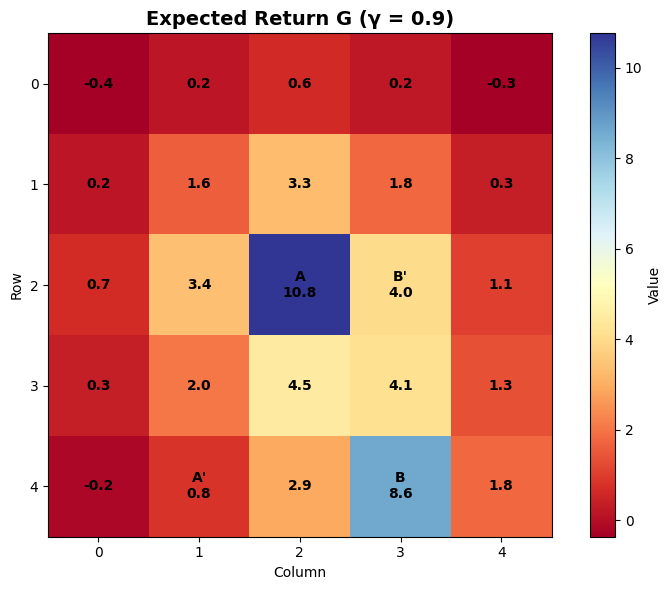


Simulated Values Grid:


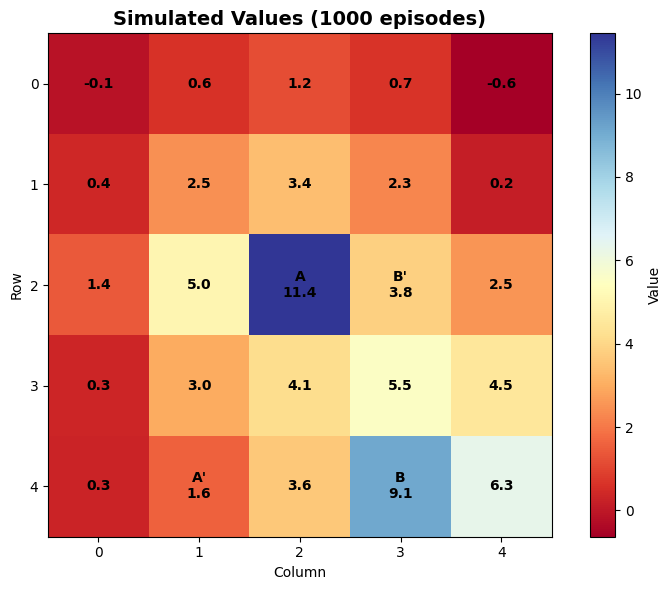

In [3]:

def plot_grid(values, title):
    # Create figure and axis with specified size
    fig, ax = plt.subplots(figsize=(8, 6))

    # Create heatmap using RdYlBu colormap (red-yellow-blue)
    # aspect='equal' ensures square cells
    im = ax.imshow(values, cmap='RdYlBu', aspect='equal')
    
    # Add text labels to each cell
    for i in range(5):
        for j in range(5):
            # Special states get letter labels plus value
            if (i, j) == (2, 2):
                text = f'A\n{values[i, j]:.1f}'
            elif (i, j) == (4, 1):
                text = f"A'\n{values[i, j]:.1f}"
            elif (i, j) == (4, 3):
                text = f'B\n{values[i, j]:.1f}'
            elif (i, j) == (2, 3):
                text = f"B'\n{values[i, j]:.1f}"
            else:
                # Regular cells just show the value
                text = f'{values[i, j]:.1f}'
            
            # Center text in each cell with bold font
            ax.text(j, i, text, ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Set axis ticks and labels
    ax.set_xticks(range(5))
    ax.set_yticks(range(5))
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    
    # Add colorbar to show value scale
    plt.colorbar(im, ax=ax, label='Value')
    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.show()

print("Expected Return Grid:")
plot_grid(expected_values, "Expected Return G (γ = 0.9)")

print("\nSimulated Values Grid:")
plot_grid(simulated_values, "Simulated Values (1000 episodes)") 

Difference between computed and simulated values:
[[0.225 0.436 0.548 0.435 0.311]
 [0.198 0.876 0.088 0.51  0.177]
 [0.761 1.651 0.687 0.138 1.48 ]
 [0.008 0.955 0.32  1.394 3.147]
 [0.485 0.739 0.733 0.524 4.541]]

Maximum difference: 4.541
Mean difference: 0.855
Episodes: 100, Mean difference: 0.378
Episodes: 500, Mean difference: 0.877
Episodes: 1000, Mean difference: 0.754
Episodes: 2000, Mean difference: 0.804
Episodes: 5000, Mean difference: 1.283


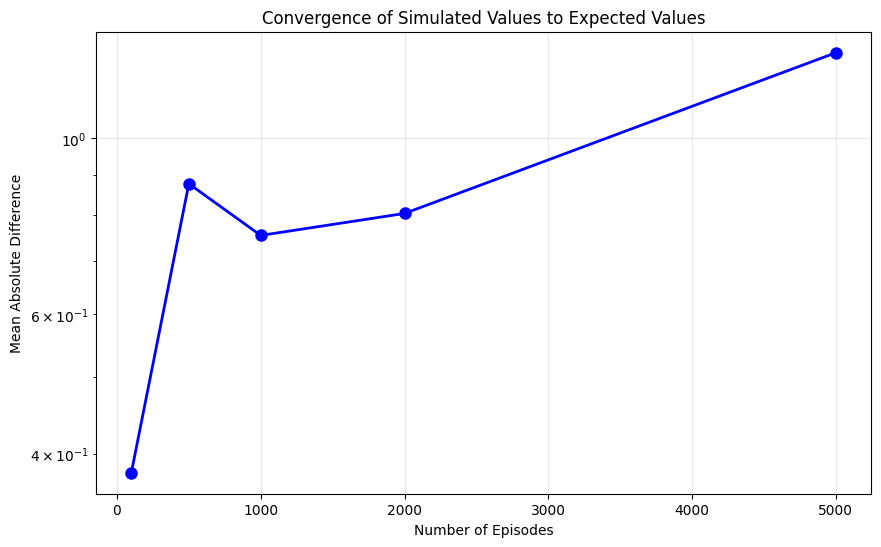

In [4]:
difference = np.abs(expected_values - simulated_values)
print("Difference between computed and simulated values:")
print(difference.round(3))
print(f"\nMaximum difference: {np.max(difference):.3f}")
print(f"Mean difference: {np.mean(difference):.3f}")

convergence_episodes = []
for episodes in [100, 500, 1000, 2000, 5000]:
    sim_vals = simulate_gridworld(episodes=episodes)
    diff = np.mean(np.abs(expected_values - sim_vals))
    convergence_episodes.append((episodes, diff))
    print(f"Episodes: {episodes}, Mean difference: {diff:.3f}")

# Extract episodes and differences for plotting
episodes, diffs = zip(*convergence_episodes)

# Create convergence plot
plt.figure(figsize=(10, 6))
# Plot with blue circles connected by lines
plt.plot(episodes, diffs, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Episodes')
plt.ylabel('Mean Absolute Difference')
plt.title('Convergence of Simulated Values to Expected Values')
# Add grid for better readability
plt.grid(True, alpha=0.3)
# Use log scale for y-axis to better show convergence
plt.yscale('log')
plt.show()


In [ ]:
def simulate_gridworld_epsilon_greedy(episodes=50000, alpha=0.05, epsilon=0.05):
    V = np.zeros((5, 5))
    for episode in range(episodes):
        pos = (np.random.randint(5), np.random.randint(5))
        episode_rewards = []
        episode_states = []
        for step in range(100):
            if pos == (0, 1):
                reward = 10
                next_pos = (4, 1)
            elif pos == (0, 3):
                reward = 5
                next_pos = (2, 3)
            else:
                if np.random.random() < epsilon:
                    action = np.random.choice(4)
                else:
                    best_value = -float('inf')
                    best_action = 0
                    for a in range(4):
                        di, dj = [(-1, 0), (1, 0), (0, -1), (0, 1)][a]
                        ni, nj = pos[0] + di, pos[1] + dj
                        if 0 <= ni < 5 and 0 <= nj < 5:
                            value = V[ni, nj]
                        else:
                            value = -1
                        if value > best_value:
                            best_value = value
                            best_action = a
                    action = best_action
                di, dj = [(-1, 0), (1, 0), (0, -1), (0, 1)][action]
                ni, nj = pos[0] + di, pos[1] + dj
                if 0 <= ni < 5 and 0 <= nj < 5:
                    reward = 0
                    next_pos = (ni, nj)
                else:
                    reward = -1
                    next_pos = pos
            
            episode_states.append(pos)
            episode_rewards.append(reward)
            pos = next_pos
        G = 0
        for t in reversed(range(len(episode_rewards))):
            G = episode_rewards[t] + gamma * G
            state = episode_states[t]
            V[state] += alpha * (G - V[state])
    return V
epsilon_greedy_values = simulate_gridworld_epsilon_greedy()
print("Epsilon-greedy values (ε=0.1):")
print(epsilon_greedy_values.round(2))

In [5]:
target_values = np.array([
    [22.0, 24.4, 22.0, 19.4, 17.5],
    [19.8, 22.0, 19.8, 17.8, 16.0],
    [17.8, 19.8, 17.8, 16.0, 14.4],
    [16.0, 17.8, 16.0, 14.4, 13.0],
    [14.4, 16.0, 14.4, 13.0, 11.7]
])

print("Target values:")
print(target_values.round(1))
print("\nEpsilon-greedy values:")
print(epsilon_greedy_values.round(1))

epsilon_diff = np.mean(np.abs(target_values - epsilon_greedy_values))
print(f"\nMean difference from target: {epsilon_diff:.3f}")

plot_grid(epsilon_greedy_values, "Epsilon-Greedy Values (ε=0.1)")


Target values:
[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]

Epsilon-greedy values:


NameError: name 'epsilon_greedy_values' is not defined

In [ ]:
print("Epsilon-greedy simulation results:")
print(epsilon_greedy_values.round(1))


In [ ]:
class WindyGridworld:
    def __init__(self, wind_strengths, stochastic=False):
        self.height = 7
        self.width = 10
        self.start = (3, 0)
        self.goal = (3, 7)
        self.wind_strengths = wind_strengths
        self.stochastic = stochastic
        
        self.actions_4 = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        self.actions_8 = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        self.actions_9 = self.actions_8 + [(0, 0)]
        
        self.action_names_4 = ['Up', 'Down', 'Left', 'Right']
        self.action_names_8 = ['Up-Left', 'Up', 'Up-Right', 'Left', 'Right', 'Down-Left', 'Down', 'Down-Right']
        self.action_names_9 = self.action_names_8 + ['Stay']
    
    def get_wind_effect(self, col):
        base_wind = self.wind_strengths[col]
        if not self.stochastic:
            return base_wind
        
        prob = np.random.random()
        if prob < 1/3:
            return base_wind - 1
        elif prob < 2/3:
            return base_wind
        else:
            return base_wind + 1
    
    def step(self, state, action, action_type='4'):
        row, col = state
        
        if action_type == '4':
            action_list = self.actions_4
        elif action_type == '8':
            action_list = self.actions_8
        else:
            action_list = self.actions_9
        
        dr, dc = action_list[action]
        
        new_row = row + dr
        new_col = col + dc
        
        new_row = max(0, min(self.height - 1, new_row))
        new_col = max(0, min(self.width - 1, new_col))
        
        wind_effect = self.get_wind_effect(new_col)
        new_row = max(0, min(self.height - 1, new_row - wind_effect))
        
        done = (new_row, new_col) == self.goal
        reward = -1
        
        return (new_row, new_col), reward, done
    
    def reset(self):
        return self.start


In [ ]:
wind_strengths = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

env_4 = WindyGridworld(wind_strengths, stochastic=False)
env_8 = WindyGridworld(wind_strengths, stochastic=False)
env_9 = WindyGridworld(wind_strengths, stochastic=False)
env_stochastic = WindyGridworld(wind_strengths, stochastic=True)

print("Windy Gridworld Setup:")
print(f"Grid size: {env_4.height} x {env_4.width}")
print(f"Start: {env_4.start}, Goal: {env_4.goal}")
print(f"Wind strengths: {wind_strengths}")
print(f"4 actions: {env_4.action_names_4}")
print(f"8 actions: {env_8.action_names_8}")
print(f"9 actions: {env_9.action_names_9}")


In [ ]:
def plot_windy_gridworld(env, trajectory=None, title="Windy Gridworld"):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    for i in range(env.height):
        for j in range(env.width):
            if (i, j) == env.start:
                color = 'green'
                marker = 'S'
                label = 'Start'
            elif (i, j) == env.goal:
                color = 'red'
                marker = 'G'
                label = 'Goal'
            else:
                color = 'lightblue'
                marker = 's'
                label = None
            
            ax.scatter(j, i, c=color, s=200, marker=marker, edgecolors='black', linewidth=1)
            
            if (i, j) == env.start:
                ax.text(j, i, 'S', ha='center', va='center', fontsize=12, fontweight='bold')
            elif (i, j) == env.goal:
                ax.text(j, i, 'G', ha='center', va='center', fontsize=12, fontweight='bold')
    
    if trajectory:
        x_coords = [pos[1] for pos in trajectory]
        y_coords = [pos[0] for pos in trajectory]
        ax.plot(x_coords, y_coords, 'b-', linewidth=2, alpha=0.7, label='Path')
        ax.scatter(x_coords[0], y_coords[0], c='green', s=100, marker='o', label='Start')
        ax.scatter(x_coords[-1], y_coords[-1], c='red', s=100, marker='o', label='End')
    
    for j in range(env.width):
        wind_strength = env.wind_strengths[j]
        if wind_strength > 0:
            ax.text(j, -0.5, f'{wind_strength}', ha='center', va='center', 
                   fontsize=10, fontweight='bold', color='blue')
    
    ax.set_xlim(-0.5, env.width - 0.5)
    ax.set_ylim(-1, env.height - 0.5)
    ax.set_aspect('equal')
    ax.invert_yaxis()
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Column (Wind strength shown below)')
    ax.set_ylabel('Row')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_windy_gridworld(env_4, title="Windy Gridworld - 4 Actions")


In [ ]:
print("Training SARSA with 4 actions...")
sarsa_4 = SARSA(env_4, alpha=0.5, epsilon=0.1, action_type='4')
sarsa_4.train(num_episodes=8000)

print("\nTraining SARSA with 8 actions...")
sarsa_8 = SARSA(env_8, alpha=0.5, epsilon=0.1, action_type='8')
sarsa_8.train(num_episodes=8000)

print("\nTraining SARSA with 9 actions...")
sarsa_9 = SARSA(env_9, alpha=0.5, epsilon=0.1, action_type='9')
sarsa_9.train(num_episodes=8000)

print("\nTraining SARSA with 8 actions and stochastic wind...")
sarsa_stochastic = SARSA(env_stochastic, alpha=0.5, epsilon=0.1, action_type='8')
sarsa_stochastic.train(num_episodes=8000)


In [ ]:
def plot_learning_curves(sarsa_agents, labels, title="Learning Curves"):
    plt.figure(figsize=(12, 8))
    
    for sarsa, label in zip(sarsa_agents, labels):
        episode_lengths = sarsa.episode_lengths
        
        window_size = 100
        if len(episode_lengths) >= window_size:
            smoothed_lengths = []
            for i in range(window_size, len(episode_lengths)):
                smoothed_lengths.append(np.mean(episode_lengths[i-window_size:i]))
            
            plt.plot(range(window_size, len(episode_lengths)), smoothed_lengths, 
                    label=f'{label} (smoothed)', linewidth=2)
        else:
            plt.plot(episode_lengths, label=label, linewidth=2)
    
    plt.xlabel('Episodes')
    plt.ylabel('Episode Length (Time Steps)')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axhline(y=15, color='red', linestyle='--', alpha=0.7, label='Minimum (15 steps)')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_learning_curves([sarsa_4, sarsa_8, sarsa_9], 
                    ['4 Actions', '8 Actions', '9 Actions'],
                    'Learning Curves: Different Action Sets')

plot_learning_curves([sarsa_8, sarsa_stochastic], 
                    ['8 Actions (Deterministic)', '8 Actions (Stochastic)'],
                    'Learning Curves: Deterministic vs Stochastic Wind')
